In [36]:
import pandas
from datetime import datetime
from pytz import utc
import matplotlib.pyplot as plt
data = pandas.read_csv("reviews.csv", parse_dates=['Timestamp'])
data.head()

,Course Name,Timestamp,Rating,Comment
0,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 06:25:52+00:00,4.0,NaN
1,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 05:12:34+00:00,4.0,NaN
2,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 05:11:03+00:00,4.0,NaN
3,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 03:33:24+00:00,5.0,NaN
4,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 03:31:49+00:00,4.5,NaN


### Rating average/count by day

In [34]:
# Convert Timestamp to date for grouping
data['Day'] = data['Timestamp'].dt.date

# Specify only numeric columns for the mean calculation
# Assuming your dataframe has numeric columns you want to average
numeric_columns = data.select_dtypes(include=['number']).columns

# Group by Day and calculate mean only for numeric columns
day_average = data.groupby(['Day'])[numeric_columns].mean()

# Display the result
list(day_average.index)

[datetime.date(2018, 1, 1),
 datetime.date(2018, 1, 2),
 datetime.date(2018, 1, 3),
 datetime.date(2018, 1, 4),
 datetime.date(2018, 1, 5),
 datetime.date(2018, 1, 6),
 datetime.date(2018, 1, 7),
 datetime.date(2018, 1, 8),
 datetime.date(2018, 1, 9),
 datetime.date(2018, 1, 10),
 datetime.date(2018, 1, 11),
 datetime.date(2018, 1, 12),
 datetime.date(2018, 1, 13),
 datetime.date(2018, 1, 14),
 datetime.date(2018, 1, 15),
 datetime.date(2018, 1, 16),
 datetime.date(2018, 1, 17),
 datetime.date(2018, 1, 18),
 datetime.date(2018, 1, 19),
 datetime.date(2018, 1, 20),
 datetime.date(2018, 1, 21),
 datetime.date(2018, 1, 22),
 datetime.date(2018, 1, 23),
 datetime.date(2018, 1, 24),
 datetime.date(2018, 1, 25),
 datetime.date(2018, 1, 26),
 datetime.date(2018, 1, 27),
 datetime.date(2018, 1, 28),
 datetime.date(2018, 1, 29),
 datetime.date(2018, 1, 30),
 datetime.date(2018, 1, 31),
 datetime.date(2018, 2, 1),
 datetime.date(2018, 2, 2),
 datetime.date(2018, 2, 3),
 datetime.date(2018, 2, 4)

In [52]:
# Convert Timestamp to date for grouping
data['Day'] = data['Timestamp'].dt.date

# Specify only numeric columns for the mean calculation
# Assuming your dataframe has numeric columns you want to average
numeric_columns = data.select_dtypes(include=['number']).columns

# Group by Day and calculate mean only for numeric columns
day_average = data.groupby(['Day'])[numeric_columns].mean()

# Display the result
day_average.head()

,Rating
Day,
2018-01-01,4.532609
2018-01-02,4.122807
2018-01-03,4.360465
2018-01-04,4.531250
2018-01-05,4.423077


In [58]:
# Convert Timestamp to date for grouping
data['Day'] = data['Timestamp'].dt.date

# Specify only numeric columns for the mean calculation
# Assuming your dataframe has numeric columns you want to average
numeric_columns = data.select_dtypes(include=['number']).columns

# Group by Day and calculate mean only for numeric columns
day_average = data.groupby(['Day']).count()[numeric_columns]

# Display the result
day_average.head()

,Rating
Day,
2018-01-01,46
2018-01-02,57
2018-01-03,43
2018-01-04,48
2018-01-05,52


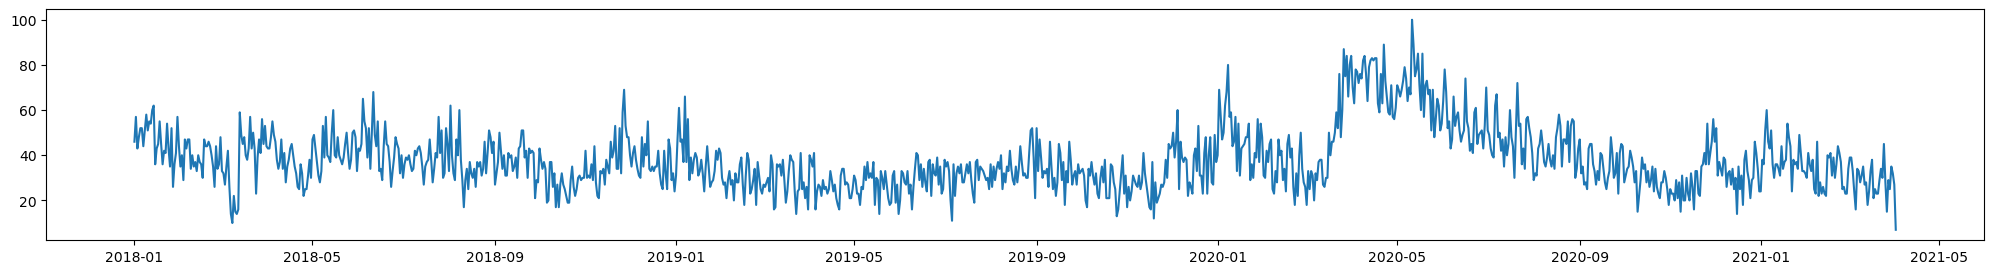

In [60]:
# Display the plot
plt.figure(figsize=(25, 3))
plt.plot(day_average.index, day_average['Rating'])

In [42]:
day_average['Rating'].min()

3.7916666666666665

### Rating average by week

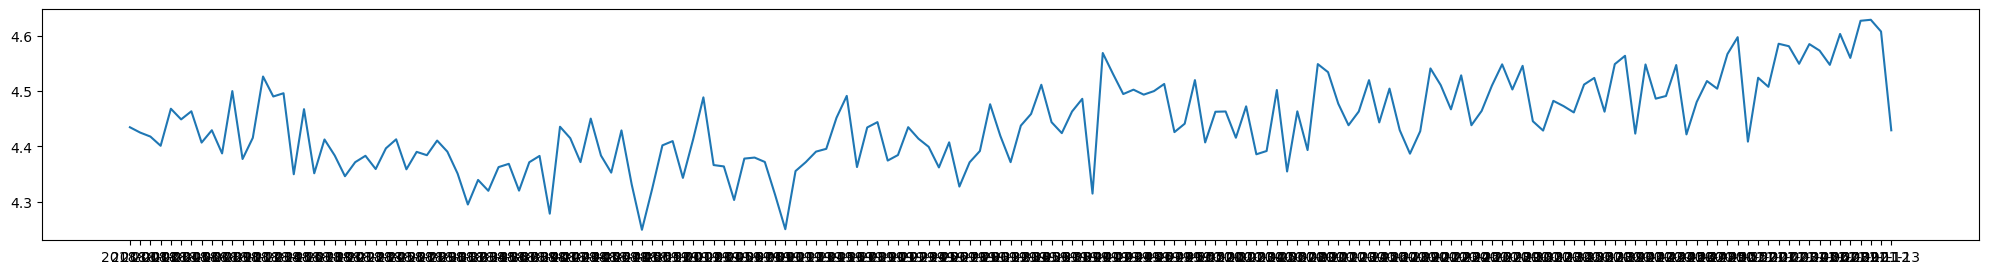

In [84]:
# Convert Timestamp to date for grouping
data['Week'] = data['Timestamp'].dt.strftime('%Y-%U')

# Only select numeric columns for the mean calculation
# Assuming 'Rating' is a numeric column
numeric_cols = ['Rating']  # Add other numeric columns if needed
week_average = data.groupby(['Week'])[numeric_cols].mean()

# Plot the results
plt.figure(figsize=(25, 3))
plt.plot(week_average.index, week_average['Rating'])